<a href="https://colab.research.google.com/github/deepikagoel1/Edufabrica-aiml/blob/main/2_July_2021_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Titanic Data Set

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Equation of Logistic Regression : $\frac{1}{1+ e^-y}$

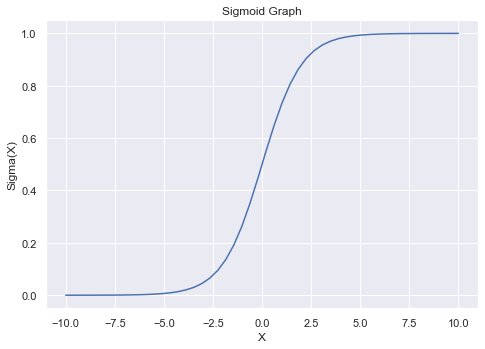

In [ ]:
X = np.linspace(-10, 10, 50)
sigma = 1/(1 + np.exp(-X))
sns.set_theme()
fig = plt.figure()
ax = fig.add_axes([0,0, 1, 1])
ax.plot(X, sigma)
ax.set_title('Sigmoid Graph')
ax.set_xlabel('X')
ax.set_ylabel('Sigma(X)')
plt.show()

In [ ]:
df = sns.load_dataset('titanic')
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
314,0,2,male,43.0,1,1,26.25,S,Second,man,True,NaN,Southampton,no,False


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
null_values = df.shape[0] - df.count()
null_value

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df[~df.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### HEATMAP

<AxesSubplot:>

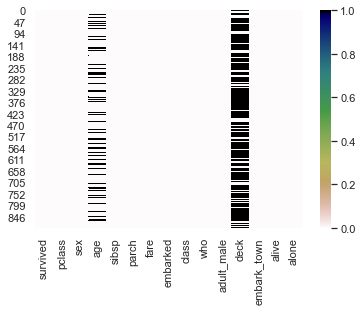

In [ ]:
sns.heatmap(df.isnull(), cmap = 'gist_earth_r')

<AxesSubplot:xlabel='sex', ylabel='count'>

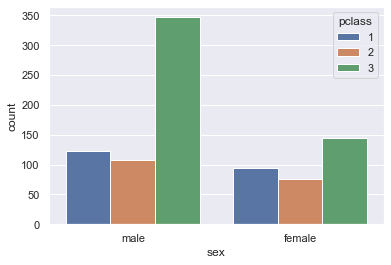

In [ ]:
sns.countplot(x = 'sex', hue = 'pclass' ,  data = df)

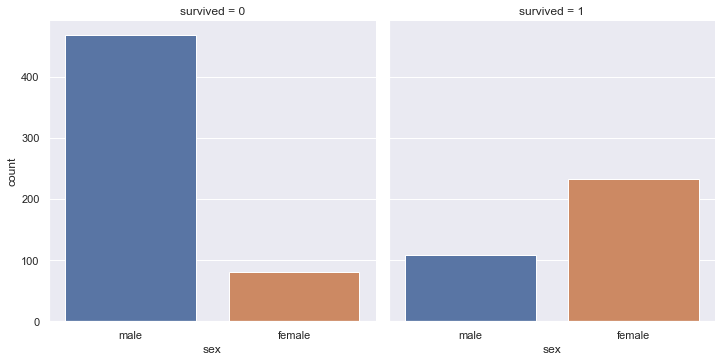

In [ ]:
sns.catplot(x='sex', col='survived', kind='count', data= df)

/Users/sumitkumarshukla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


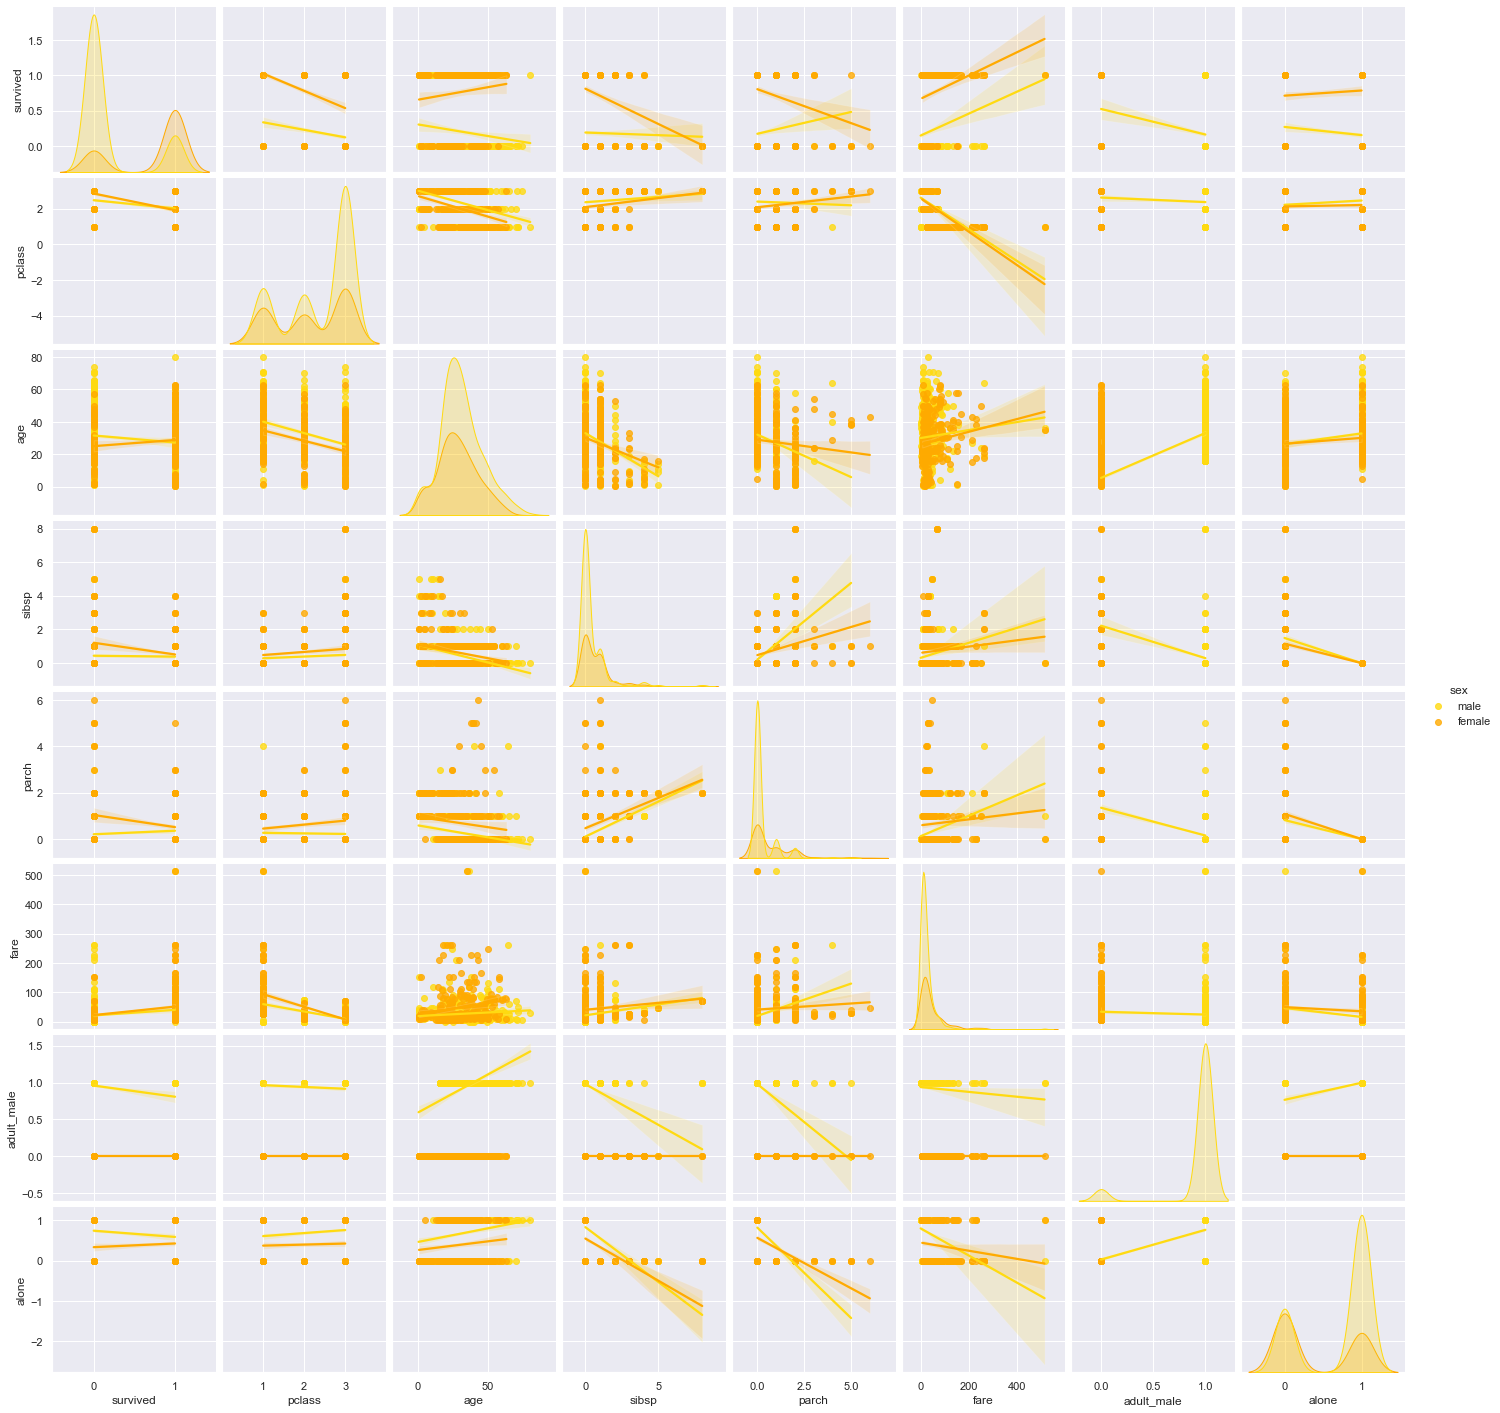

In [ ]:
sns.pairplot(df, kind= 'reg', diag_kind= 'kde', palette= 'Wistia', hue= 'sex')

### Data Cleaning

In [ ]:
dr = df.isnull().sum()
dr

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(182, 15)

### predictors

In [ ]:
df.columns.values[1:]

array(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive',
       'alone'], dtype=object)

In [ ]:
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


### dummies

In [ ]:
sex = pd.get_dummies(df['sex'], drop_first = True)
sex[:2]

,male
1,0
3,0


In [ ]:
embark = pd.get_dummies(df['embarked'], drop_first=True)
embark[:2]

,Q,S
1,0,0
3,0,1


In [ ]:
Class = pd.get_dummies(df['pclass'], drop_first=True)
Class[:2]

,2,3
1,0,0
3,0,0


### concat

In [ ]:
df = pd.concat([df, sex, embark, Class], axis = 1)

TypeError: concat() got an unexpected keyword argument 'inplace'

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,male,Q,S,2,3
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
6,0,1,male,54.0,0,0,51.8625,S,1,0,1,0,0
10,1,3,female,4.0,1,1,16.7000,S,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,0,0,1,0,0


In [ ]:
df.drop(['sex','pclass','embarked'], axis = 1, inplace = True)

In [ ]:
df.shape

(182, 10)

In [ ]:
titanic_train = df
titanic_train.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


### Training and testing 

In [ ]:
X = titanic_train.drop('survived', axis = 1)
y = titanic_train['survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=6)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
log_model = LogisticRegression()

### fit the value

In [ ]:
log_model.fit(X_train, y_train)

/Users/sumitkumarshukla/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predictions

In [ ]:
pred = log_model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.88      0.73      0.80        41

    accuracy                           0.75        61
   macro avg       0.74      0.77      0.74        61
weighted avg       0.79      0.75      0.76        61



In [ ]:
accuracy_score(y_test, pred)*100

75.40983606557377

### Testting

In [ ]:
titanic_train.columns.values

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S', 2,
       3], dtype=object)

In [ ]:
def predictor(age = 38.0 , sibsp = 1, parch = 0, fare = 71.2833, male = 0, Q = 0, S= 0, second = 0, third = 0 ):
    result = log_model.predict([[age, sibsp, parch, fare, male, Q, S, second, third]])
    if result == np.array([1]):
        print('Passenger Survived')
    else:
        print('Passenger Died')

In [ ]:
titanic_train = df
titanic_train.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


In [ ]:
log_model.predict([[38.0, 1, 0, 71.23, 0, 0, 0, 0, 0]])

array([1])

In [ ]:
predictor(23.0, 1, 0, 176.321, 0, 0, 1, 0, 1)

Passenger Survived


In [ ]:
data = np.arange(1, 11)
data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
np.random.shuffle(data)

In [ ]:
data

array([ 6,  4,  9, 10,  3,  8,  1,  2,  7,  5])

In [ ]:
train = data[:6]
test  = data[6:]
train, test

(array([ 6,  4,  9, 10,  3,  8]), array([1, 2, 7, 5]))